<a href="https://colab.research.google.com/github/sujitojha1/EVA4/blob/master/S8/EVA4_S8_Solution_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement EVA 4, Session8 : CIFAR 10

**Target**: 


*   Extract the ResNet18 model from this repository and add it to your API/repo.
*   Use your data loader, model loading, train, and test code to train ResNet18 on Cifar10
*   Target is 85% accuracy. No limit on the number of epochs. Use default ResNet18 code (so params are fixed). 

**Results**

*  Total Parameters = 
*  After 10 Epochs, Final Train Accuracy = 
*  After 10 Epochs, Final Test Accuracy =

**Analysis**

*  Target accuracy > 85% using Reset18 architecture. Model performance is good as train and test accuracy is small.

## 1. Loading Libraries

In [2]:
from __future__ import print_function

import torch.optim as optim    #Optimizatin functions like SGD, ADAMS,
import numpy as np

# Plottting libraries
import matplotlib.pyplot as plt

%matplotlib inline

# Load modules/models from EVA course
!rm -rf EVA4
!git clone https://github.com/sujitojha1/EVA4

Cloning into 'EVA4'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 103 (delta 22), reused 73 (delta 17), pack-reused 0
Receiving objects: 100% (103/103), 58.48 KiB | 19.49 MiB/s, done.
Resolving deltas: 100% (22/22), done.



## 2. Loading train and test data with transforms and loader functions

In [3]:
from EVA4.Modules import *
cifar10 = dataset_cifar10(sample=False,batch_size=128)
sample_cifar10 = dataset_cifar10(sample=True,batch_size=5)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True
CUDA availability ? True



Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## 3. Exploratory Data Analysis

### 3.1 Summary Statistics

In [4]:
# Load train data as numpy array
train_data = sample_cifar10.data(train_flag=True).data
test_data = sample_cifar10.data(train_flag=False).data

total_data = np.concatenate((train_data, test_data), axis=0)
print(total_data.shape)
print(total_data.mean(axis=(0,1,2))/255)
print(total_data.std(axis=(0,1,2))/255)
#print(vars(train))

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### 3.2 Plotting sample images

Files already downloaded and verified
  ship   ship  plane   frog    car


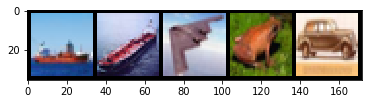

In [5]:
import torchvision

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

# get some random training images
dataiter = iter(sample_cifar10.loader(train_flag=True))
images,labels = dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%6s' % classes[labels[j]] for j in range(5)))

# The Model

In [8]:
from EVA4.Models import *

# Loading ResNet18 Model
net = ResNet18()

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


# Model Summary

In [9]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# Define a Loss function and optimizer

In [0]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

# Training and Testing

In [11]:
# Load train and test model
from EVA4.Modules import *

train = train()
test = test()

for epoch in range(11):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    test.execute(net, device, testloader, criterion)

print('Finished Training')

  0%|          | 0/391 [00:00<?, ?it/s]


Epoch: 0


Loss=1.209367036819458 Batch_id=390 Accuracy=42.18: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 6000/10000 (60.00%)


Epoch: 1


Loss=1.0126190185546875 Batch_id=390 Accuracy=62.83: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 6578/10000 (65.78%)


Epoch: 2


Loss=0.7179192900657654 Batch_id=390 Accuracy=72.28: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7471/10000 (74.71%)


Epoch: 3


Loss=0.594066858291626 Batch_id=390 Accuracy=77.01: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7779/10000 (77.79%)


Epoch: 4


Loss=0.6931103467941284 Batch_id=390 Accuracy=79.87: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8148/10000 (81.48%)


Epoch: 5


Loss=0.4942716658115387 Batch_id=390 Accuracy=82.16: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8286/10000 (82.86%)


Epoch: 6


Loss=0.5571851134300232 Batch_id=390 Accuracy=83.58: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8213/10000 (82.13%)


Epoch: 7


Loss=0.44487494230270386 Batch_id=390 Accuracy=84.93: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8577/10000 (85.77%)


Epoch: 8


Loss=0.24872681498527527 Batch_id=390 Accuracy=86.18: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8363/10000 (83.63%)


Epoch: 9


Loss=0.2540697455406189 Batch_id=390 Accuracy=87.12: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8463/10000 (84.63%)


Epoch: 10


Loss=0.2678679823875427 Batch_id=390 Accuracy=87.90: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]



Test set: Average loss: 0.0035, Accuracy: 8617/10000 (86.17%)

Finished Training


# display an image from the test set

Files already downloaded and verified
GroundTruth:    cat horse  bird truck


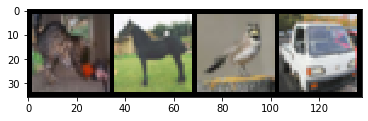

In [14]:
dataiter = iter(sample_cifar10.loader(train_flag=False))
images, labels = dataiter.next()


# print images
imshow(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Prediction of sampe test set

In [15]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat horse  bird  deer


# Plotting Train & Test Accuracy/Losses

Text(0.5, 1.0, 'Test Accuracy')

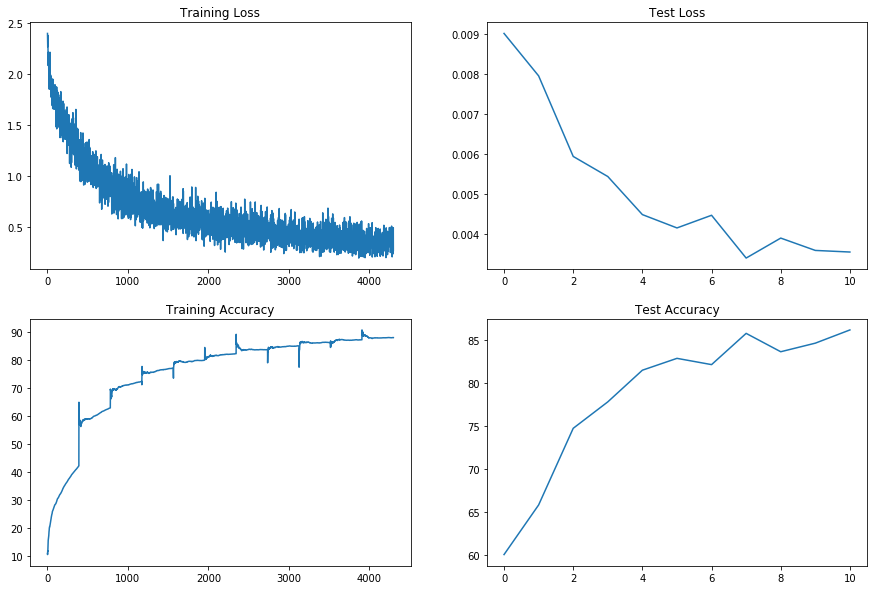

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test.test_acc)
axs[1, 1].set_title("Test Accuracy")

# Evaluating test Accuracy over different classes 

In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels = images.to(device),labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 93 %
Accuracy of   car : 96 %
Accuracy of  bird : 83 %
Accuracy of   cat : 59 %
Accuracy of  deer : 81 %
Accuracy of   dog : 80 %
Accuracy of  frog : 94 %
Accuracy of horse : 78 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %
